In [1]:
# Importing requests to extract content from a url
import requests
# Beautifulsoup is for web scrapping...used to scrap specific content
from bs4 import BeautifulSoup as bs  
import re 
iphone_reviews= []

In [2]:
iphone_snapdeal=[]
url1= "https://www.snapdeal.com/product/apple-iphone-5c-16-gb/988871559/reviews?page="
url2= "&sortBy=RECENCY&vsrc=rcnt#defRevPDP"

for i in range(1,10):
    ip= []  
    base_url= url1+str(i)+url2
    response= requests.get(base_url)
    soup= bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
    temp= soup.findAll("div",attrs={"class","user-review"})# Extracting the content under specific tags  
    for j in range(len(temp)):
        ip.append(temp[j].find("p").text)
        iphone_snapdeal= iphone_snapdeal+ip

In [3]:
### Removing repeated reviews 
iphone_snapdeal = list(set(iphone_snapdeal))

In [4]:
# Writing reviews into text file 
with open("ip_snapdeal.txt","w",encoding="utf-8") as snp:
    snp.write(str(iphone_snapdeal))

In [5]:
iphone_snapdeal

["I'm also happy with Snapdeal service",
 'Very good one perfectly the original one with all original accessories',
 'offer product is available, customer care also good',
 'Price and delivery service are good I received my order on time',
 "Totaly satisfy with the product... It is a brand new 100% genuine iphone. And got it within 24 hours of ordering.... Packing was superb with 'PRIORITY' mark on the box.... Thanx to snapdeal !",
 'Mobile was got no hang smooth  touch  performing well',
 'Features are good....but the phone gets heated after some time',
 'got this at a great discount, the phone is worth it. my wife wanted to try an iphone and she is loving it now',
 'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted',
 'Great product at such amazing price. Delivery was fast. N iPhone is amazing.',
 'very good product...thanks to sn

## Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import TweetTokenizer
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Importing Data

In [7]:
ip_snapd= pd.read_csv('ip_snapdeal.txt',encoding='Latin-1')
ip_snapd

,"[""I'm also happy with Snapdeal service""",'Very good one perfectly the original one with all original accessories','offer product is available,customer care also good','Price and delivery service are good I received my order on time',"""Totaly satisfy with the product... It is a brand new 100% genuine iphone. And got it within 24 hours of ordering.... Packing was superb with 'PRIORITY' mark on the box.... Thanx to snapdeal !""",'Mobile was got no hang smooth touch performing well','Features are good....but the phone gets heated after some time','got this at a great discount,the phone is worth it. my wife wanted to try an iphone and she is loving it now',...,'Satisfied and will buy more products from Snapdeal','A mush have deal','The product quality is good but the only thing is memory capacity is not sufficient for storing the data','Good phone','Really happy with the product and service..always the best..:)','Good i phone mobile oparating essy,inter net fast working','I am really happy with product','lovely fastest super','Good buy at an affordable price during the sale.']


In [8]:
ip_snapd= ' '.join(ip_snapd)
ip_snapd

'["I\'m also happy with Snapdeal service"  \'Very good one perfectly the original one with all original accessories\'  \'offer product is available  customer care also good\'  \'Price and delivery service are good I received my order on time\'  "Totaly satisfy with the product... It is a brand new 100% genuine iphone. And got it within 24 hours of ordering.... Packing was superb with \'PRIORITY\' mark on the box.... Thanx to snapdeal !"  \'Mobile was got no hang smooth  touch  performing well\'  \'Features are good....but the phone gets heated after some time\'  \'got this at a great discount  the phone is worth it. my wife wanted to try an iphone and she is loving it now\'  \'I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that. But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted\'  \'Great product at such amazing price. Delivery was fast. N iPhone is amazing.\'  \'very good product...t

In [9]:
# Remove Punctuations 
no_punc_text= ip_snapd.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Im also happy with Snapdeal service  Very good one perfectly the original one with all original accessories  offer product is available  customer care also good  Price and delivery service are good I received my order on time  Totaly satisfy with the product It is a brand new 100 genuine iphone And got it within 24 hours of ordering Packing was superb with PRIORITY mark on the box Thanx to snapdeal   Mobile was got no hang smooth  touch  performing well  Features are goodbut the phone gets heated after some time  got this at a great discount  the phone is worth it my wife wanted to try an iphone and she is loving it now  I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  Great product at such amazing price Delivery was fast N iPhone is amazing  very good productthanks to snapdeal and sellers to delivered the original phone 0  iphone re

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rumana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
# remove https or url within text
no_url_text= re.sub(r'http\S+', '', no_punc_text)
no_url_text

'Im also happy with Snapdeal service  Very good one perfectly the original one with all original accessories  offer product is available  customer care also good  Price and delivery service are good I received my order on time  Totaly satisfy with the product It is a brand new 100 genuine iphone And got it within 24 hours of ordering Packing was superb with PRIORITY mark on the box Thanx to snapdeal   Mobile was got no hang smooth  touch  performing well  Features are goodbut the phone gets heated after some time  got this at a great discount  the phone is worth it my wife wanted to try an iphone and she is loving it now  I am very very happy with this iPhone when I was ordering this phone I had little doubt about that But after receiving this phone I am really very happyalso found original I iPhoneearlier I had doubted  Great product at such amazing price Delivery was fast N iPhone is amazing  very good productthanks to snapdeal and sellers to delivered the original phone 0  iphone re

In [12]:
text_tokens= word_tokenize(no_url_text)
print(text_tokens)

['Im', 'also', 'happy', 'with', 'Snapdeal', 'service', 'Very', 'good', 'one', 'perfectly', 'the', 'original', 'one', 'with', 'all', 'original', 'accessories', 'offer', 'product', 'is', 'available', 'customer', 'care', 'also', 'good', 'Price', 'and', 'delivery', 'service', 'are', 'good', 'I', 'received', 'my', 'order', 'on', 'time', 'Totaly', 'satisfy', 'with', 'the', 'product', 'It', 'is', 'a', 'brand', 'new', '100', 'genuine', 'iphone', 'And', 'got', 'it', 'within', '24', 'hours', 'of', 'ordering', 'Packing', 'was', 'superb', 'with', 'PRIORITY', 'mark', 'on', 'the', 'box', 'Thanx', 'to', 'snapdeal', 'Mobile', 'was', 'got', 'no', 'hang', 'smooth', 'touch', 'performing', 'well', 'Features', 'are', 'goodbut', 'the', 'phone', 'gets', 'heated', 'after', 'some', 'time', 'got', 'this', 'at', 'a', 'great', 'discount', 'the', 'phone', 'is', 'worth', 'it', 'my', 'wife', 'wanted', 'to', 'try', 'an', 'iphone', 'and', 'she', 'is', 'loving', 'it', 'now', 'I', 'am', 'very', 'very', 'happy', 'with', 

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rumana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rumana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Tokens count
len(text_tokens)

1573

In [15]:
# Remove Stopwords
my_stop_words= stopwords.words('english')

sw_list= ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens= [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Im', 'also', 'happy', 'Snapdeal', 'service', 'Very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessories', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'Price', 'delivery', 'service', 'good', 'received', 'order', 'time', 'Totaly', 'satisfy', 'product', 'It', 'brand', 'new', '100', 'genuine', 'iphone', 'And', 'got', 'within', '24', 'hours', 'ordering', 'Packing', 'superb', 'PRIORITY', 'mark', 'box', 'Thanx', 'snapdeal', 'Mobile', 'got', 'hang', 'smooth', 'touch', 'performing', 'well', 'Features', 'goodbut', 'phone', 'gets', 'heated', 'time', 'got', 'great', 'discount', 'phone', 'worth', 'wife', 'wanted', 'try', 'iphone', 'loving', 'happy', 'iPhone', 'ordering', 'phone', 'little', 'doubt', 'But', 'receiving', 'phone', 'really', 'happyalso', 'found', 'original', 'iPhoneearlier', 'doubted', 'Great', 'product', 'amazing', 'price', 'Delivery', 'fast', 'N', 'iPhone', 'amazing', 'good', 'productthanks', 'snapdeal', 'sellers', 'delivered', 'original

In [16]:
# Normalize the data
lower_words= [Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['delivered', 'original', 'phone', '0', 'iphone', 'really', 'nice', 'cell', 'good', 'price', 'great', 'seller', 'genuine', 'product', 'fast', 'shipping', 'recommended', 'its', 'close', '5', 'months', 'since', 'bought', 'product', 'till', 'happy', 'product', 'performed', 'pros', 'picture', 'quality', 'awesome', 'sound', 'hearing', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncons', 'you', 'transfer', 'files', 'using', 'bluetooth', 'andriodblackberrywindows', 'iphone', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnother', 'good', 'new', 'iphone', 'till', 'itnniphone', '5c', 'snapdeal', 'time', 'delivery', '4', 'stars', 'it', 'nice', 'phone', 'apple', 'camera', 'good', 'phone', 'works', 'perfectly', 'it', 'worth', 'shot', 'simple', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lagging', 'till', 'todaynsuitable', 'business', 'need', 'the', 'piece', 'delivered', 'good']


In [17]:
# Stemming (Optional)
ps= PorterStemmer()
stemmed_tokens= [ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['deliv', 'origin', 'phone', '0', 'iphon', 'realli', 'nice', 'cell', 'good', 'price', 'great', 'seller', 'genuin', 'product', 'fast', 'ship', 'recommend', 'it', 'close', '5', 'month', 'sinc', 'bought', 'product', 'till', 'happi', 'product', 'perform', 'pro', 'pictur', 'qualiti', 'awesom', 'sound', 'hear', 'ad', 'good', 'look', 'feel', 'good', 'n', 'ncon', 'you', 'transfer', 'file', 'use', 'bluetooth', 'andriodblackberrywindow', 'iphon', 'you', 'use', 'file', 'transfer', 'app', 'like', 'shareitnnoth', 'good', 'new', 'iphon', 'till', 'itnniphon', '5c', 'snapdeal', 'time', 'deliveri', '4', 'star', 'it', 'nice', 'phone', 'appl', 'camera', 'good', 'phone', 'work', 'perfectli', 'it', 'worth', 'shot', 'simpl', 'nall', 'thing', 'u', 'need', 'ni', 'buy', '2', 'year', 'snapdeal', 'still', 'perfect', 'conditionnno', 'lag', 'till', 'todaynsuit', 'busi', 'need', 'the', 'piec', 'deliv', 'good']


In [18]:
# Lemmatization
import spacy
from spacy.lang.en.examples import sentences
nlp= spacy.load('en_core_web_sm')
doc= nlp(' '.join(lower_words))
print(doc)

im also happy snapdeal service very good one perfectly original one original accessories offer product available customer care also good price delivery service good received order time totaly satisfy product it brand new 100 genuine iphone and got within 24 hours ordering packing superb priority mark box thanx snapdeal mobile got hang smooth touch performing well features goodbut phone gets heated time got great discount phone worth wife wanted try iphone loving happy iphone ordering phone little doubt but receiving phone really happyalso found original iphoneearlier doubted great product amazing price delivery fast n iphone amazing good productthanks snapdeal sellers delivered original phone 0 iphone really nice cell good price great seller genuine product fast shipping recommended its close 5 months since bought product till happy product performed pros picture quality awesome sound hearing ad good look feel good n ncons you transfer files using bluetooth andriodblackberrywindows iph

In [19]:
lemmas= [token.lemma_ for token in doc]
print(lemmas)

['I', 'm', 'also', 'happy', 'snapdeal', 'service', 'very', 'good', 'one', 'perfectly', 'original', 'one', 'original', 'accessory', 'offer', 'product', 'available', 'customer', 'care', 'also', 'good', 'price', 'delivery', 'service', 'good', 'receive', 'order', 'time', 'totaly', 'satisfy', 'product', 'it', 'brand', 'new', '100', 'genuine', 'iphone', 'and', 'get', 'within', '24', 'hour', 'order', 'pack', 'superb', 'priority', 'mark', 'box', 'thanx', 'snapdeal', 'mobile', 'get', 'hang', 'smooth', 'touch', 'perform', 'well', 'feature', 'goodbut', 'phone', 'get', 'heated', 'time', 'get', 'great', 'discount', 'phone', 'worth', 'wife', 'want', 'try', 'iphone', 'love', 'happy', 'iphone', 'order', 'phone', 'little', 'doubt', 'but', 'receive', 'phone', 'really', 'happyalso', 'find', 'original', 'iphoneearli', 'doubt', 'great', 'product', 'amazing', 'price', 'delivery', 'fast', 'n', 'iphone', 'amazing', 'good', 'productthank', 'snapdeal', 'seller', 'deliver', 'original', 'phone', '0', 'iphone', 'r

In [20]:
clean_comments= ' '.join(lemmas)
clean_comments

'I m also happy snapdeal service very good one perfectly original one original accessory offer product available customer care also good price delivery service good receive order time totaly satisfy product it brand new 100 genuine iphone and get within 24 hour order pack superb priority mark box thanx snapdeal mobile get hang smooth touch perform well feature goodbut phone get heated time get great discount phone worth wife want try iphone love happy iphone order phone little doubt but receive phone really happyalso find original iphoneearli doubt great product amazing price delivery fast n iphone amazing good productthank snapdeal seller deliver original phone 0 iphone really nice cell good price great seller genuine product fast shipping recommend its close 5 month since buy product till happy product perform pro picture quality awesome sound hear ad good look feel good n ncon you transfer file use bluetooth andriodblackberrywindow iphone you use file transfer app like shareitnnothe

In [21]:
# feature extraction
cv= CountVectorizer()
clean_commentscv= cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'also': 21, 'happy': 151, 'snapdeal': 332, 'service': 310, 'very': 390, 'good': 142, 'one': 226, 'perfectly': 241, 'original': 232, 'accessory': 12, 'offer': 225, 'product': 263, 'available': 32, 'customer': 85, 'care': 58, 'price': 255, 'delivery': 96, 'receive': 286, 'order': 231, 'time': 367, 'totaly': 373, 'satisfy': 301, 'it': 176, 'brand': 48, 'new': 218, '100': 1, 'genuine': 138, 'iphone': 172, 'and': 24, 'get': 139, 'within': 399, '24': 5, 'hour': 161, 'pack': 235, 'superb': 346, 'priority': 258, 'mark': 197, 'box': 47, 'thanx': 354, 'mobile': 205, 'hang': 150, 'smooth': 329, 'touch': 374, 'perform': 242, 'well': 394, 'feature': 124, 'goodbut': 143, 'phone': 244, 'heated': 156, 'great': 147, 'discount': 100, 'worth': 405, 'wife': 397, 'want': 391, 'try': 379, 'love': 192, 'little': 190, 'doubt': 104, 'but': 53, 'really': 285, 'happyalso': 152, 'find': 128, 'iphoneearli': 174, 'amazing': 23, 'fast': 123, 'productthank': 266, 'seller': 309, 'deliver': 95, 'nice': 220, 'cell': 60

In [23]:
print(cv.get_feature_names()[100:200])

['discount', 'dispatchnprosn1', 'display', 'do', 'doubt', 'doubtfull', 'dream', 'dt', 'due', 'earn', 'easy', 'eliveryi', 'emi', 'essy', 'even', 'ever', 'everyone', 'everything', 'excellent', 'expectation', 'experience', 'fake', 'family', 'fast', 'feature', 'feel', 'file', 'fill', 'find', 'finger', 'first', 'five', 'flaw', 'fraudulent', 'free', 'friend', 'fully', 'gb', 'genuine', 'get', 'gift', 'go', 'good', 'goodbut', 'goood', 'got', 'grand', 'great', 'guess', 'hahahaha', 'hang', 'happy', 'happyalso', 'have', 'headphone', 'hear', 'heated', 'heavy', 'hesitate', 'honest', 'honestly', 'hour', 'however', 'hv', 'in', 'initially', 'inter', 'interaction', 'interest', 'io', 'ios', 'ios9', 'iphone', 'iphone5c', 'iphoneearli', 'issue', 'it', 'item', 'itnniphone', 'its', 'job', 'lack', 'lag', 'lagging', 'late', 'leave', 'level', 'like', 'limit', 'listnnapple', 'little', 'look', 'love', 'lovely', 'low', 'make', 'manufacturer', 'mark', 'marvallous', 'may']


In [24]:
print(clean_commentscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(clean_commentscv.toarray().shape)

(1028, 410)


## n-gram

In [26]:
cv_ngram_range= CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram= cv_ngram_range.fit_transform(lemmas)

In [27]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['100', '5c', 'also', 'amazing', 'and', 'apple', 'awesome', 'awsme', 'battery', 'body', 'box', 'brand', 'budget', 'but', 'buy', 'camera', 'cheap', 'condition', 'day', 'deal', 'deliver', 'delivery', 'do', 'even', 'excellent', 'experience', 'fast', 'file', 'gb', 'genuine', 'get', 'go', 'good', 'got', 'great', 'hang', 'happy', 'have', 'interest', 'io', 'iphone', 'issue', 'it', 'its', 'late', 'like', 'look', 'low', 'memory', 'mobile', 'need', 'new', 'nice', 'not', 'one', 'order', 'original', 'pack', 'perfect', 'phone', 'plastic', 'price', 'problem', 'product', 'quality', 'really', 'receive', 'recommend', 'satisfactory', 'satisfied', 'say', 'scheme', 'seller', 'service', 'shipping', 'shop', 'site', 'snap', 'snapdeal', 'so', 'space', 'superb', 'take', 'thank', 'the', 'thing', 'this', 'though', 'till', 'time', 'true', 'update', 'use', 'very', 'want', 'well', 'within', 'worth', 'would', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 

In [28]:
# tfidf vectorizer
tfidfv_ngram_max_features= TfidfVectorizer(norm= 'l2',analyzer= 'word',ngram_range= (1,3),max_features= 500)
tfidf_matix_ngram= tfidfv_ngram_max_features.fit_transform(lemmas)

## Generate Wordcloud

In [29]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

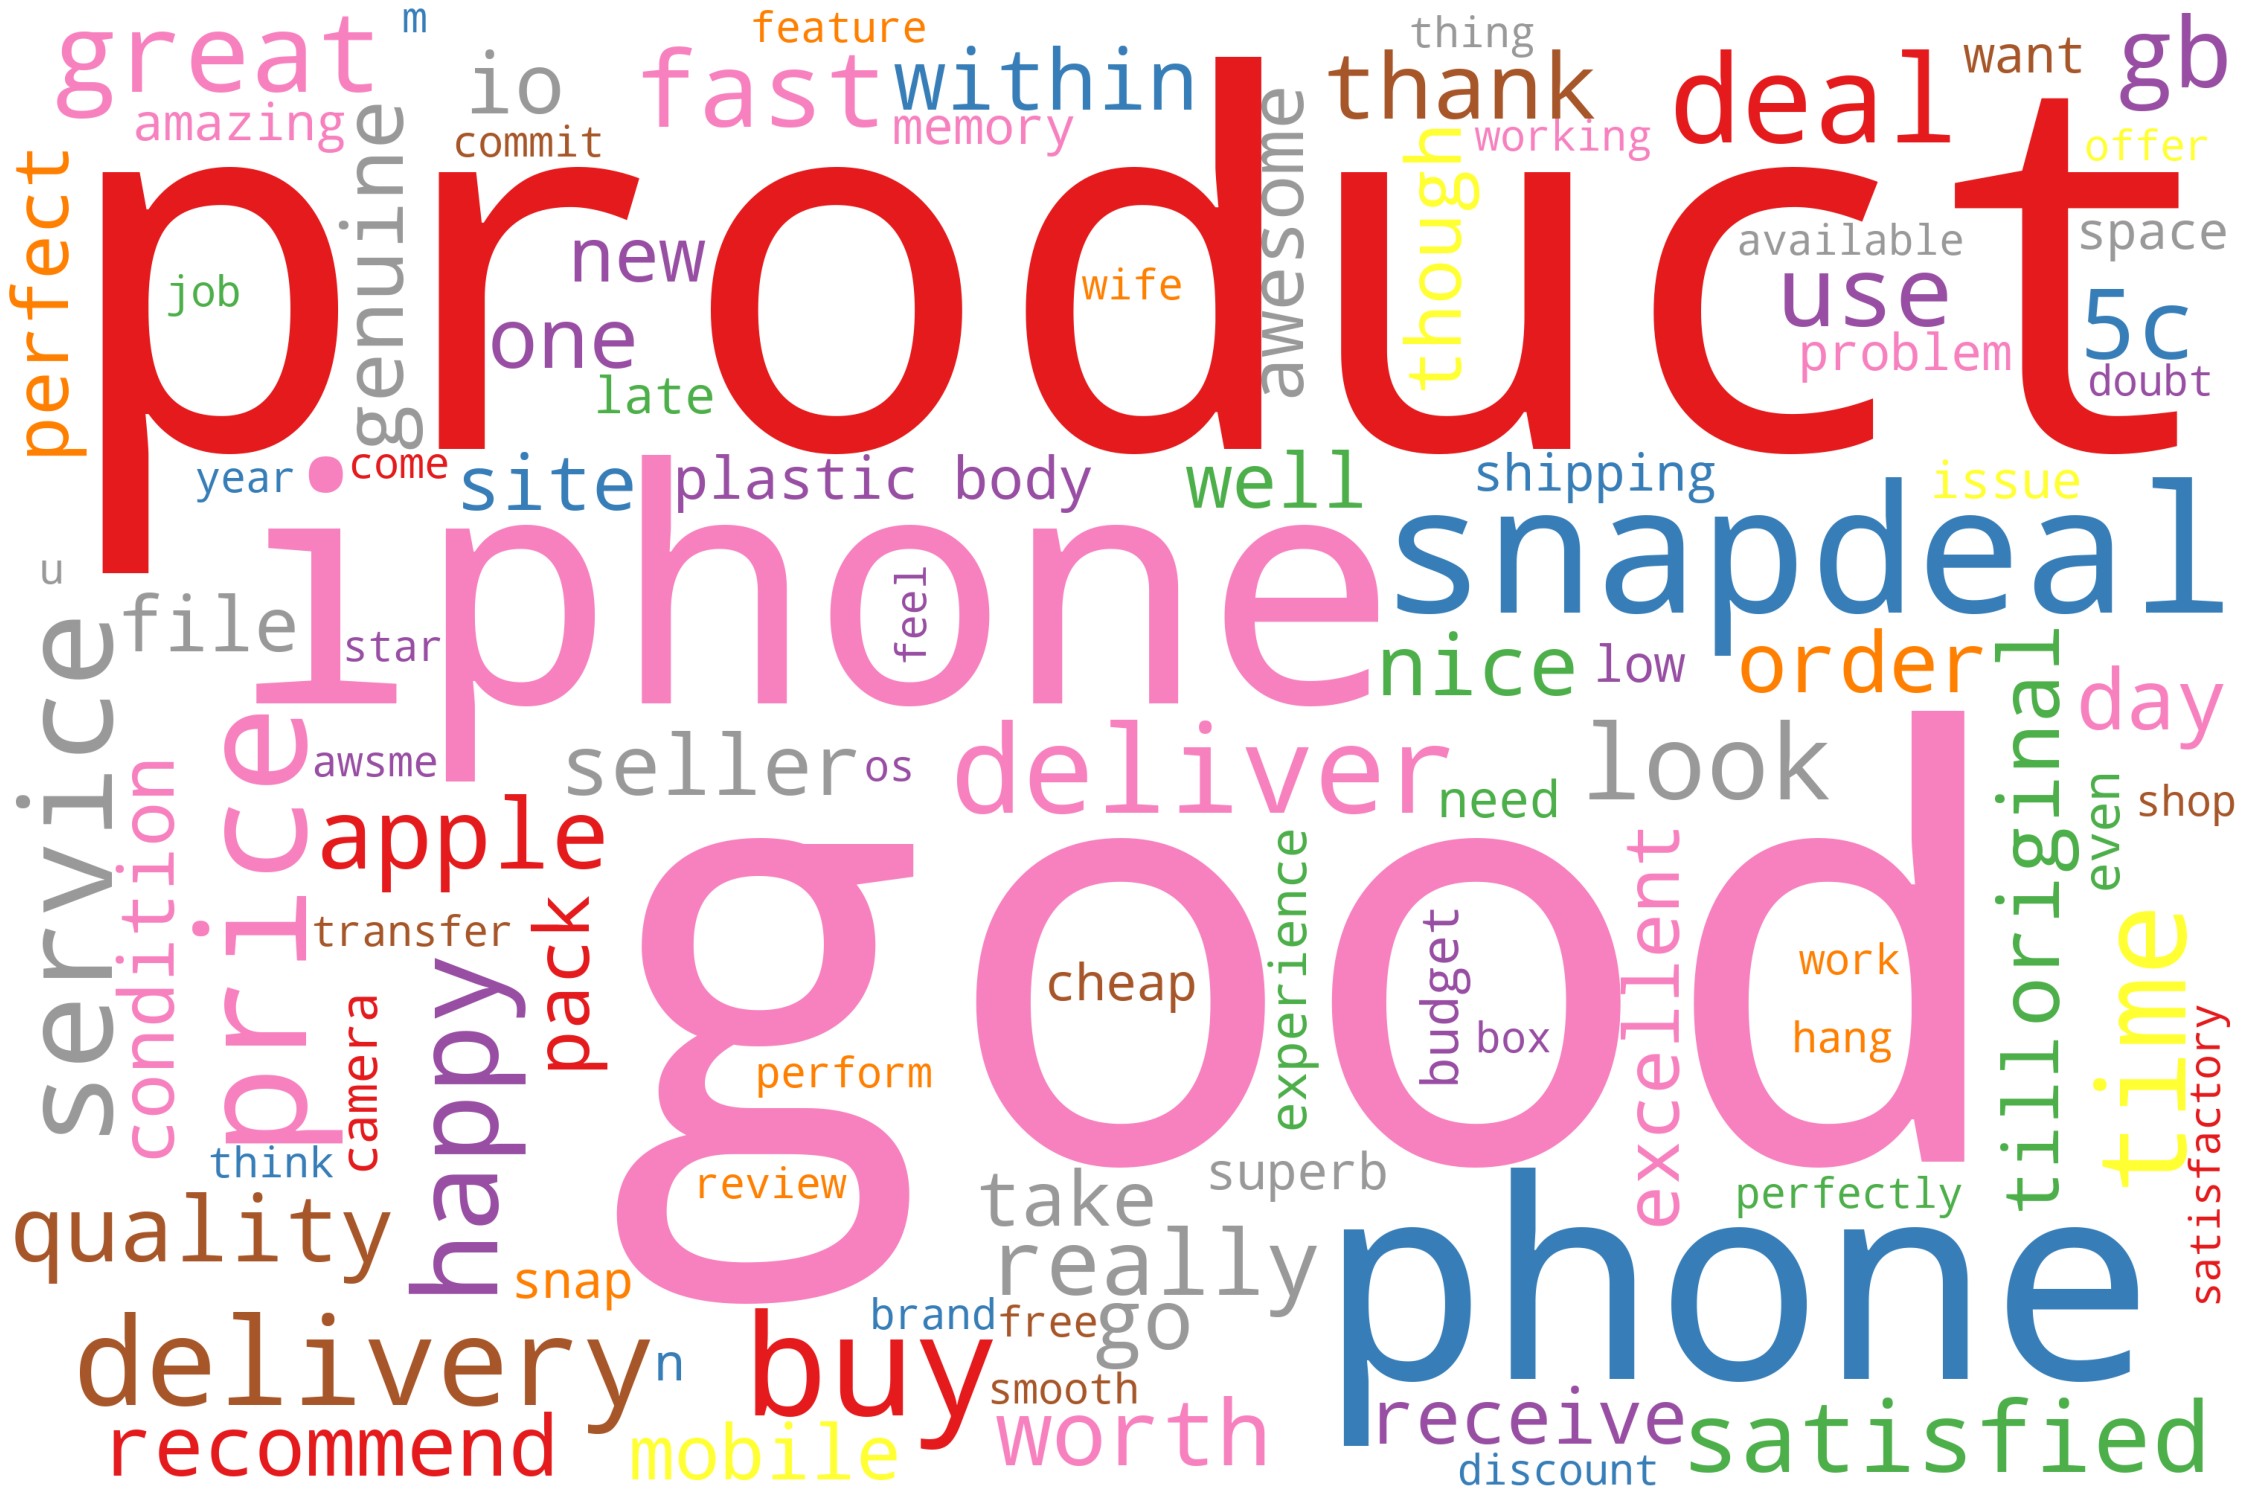

In [30]:
# Generate wordcloud
stopwords= STOPWORDS
stopwords.add('pron')
stopwords.add('rt')
stopwords.add('yeah')
wordcloud= WordCloud(width= 3000, height= 2000, background_color= 'white', max_words= 100,colormap= 'Set1',stopwords=stopwords).generate(clean_comments)
# Plot
plot_cloud(wordcloud)

## Name Entity Recognition

In [31]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')
one_block= clean_comments
doc_block= nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block[100:200]:
    print(token,token.pos_)

seller NOUN
deliver VERB
original ADJ
phone NOUN
0 NUM
iphone NOUN
really ADV
nice ADJ
cell NOUN
good ADJ
price NOUN
great ADJ
seller NOUN
genuine ADJ
product NOUN
fast ADJ
shipping NOUN
recommend VERB
its PRON
close ADJ
5 NUM
month NOUN
since SCONJ
buy NOUN
product NOUN
till SCONJ
happy ADJ
product NOUN
perform VERB
pro ADJ
picture NOUN
quality NOUN
awesome ADJ
sound NOUN
hear VERB
ad NOUN
good ADJ
look NOUN
feel VERB
good ADJ
n CCONJ
ncon NOUN
you PRON
transfer VERB
file NOUN
use VERB
bluetooth DET
andriodblackberrywindow NOUN
iphone NOUN
you PRON
use VERB
file NOUN
transfer NOUN
app ADV
like ADP
shareitnnother ADV
good ADJ
new ADJ
iphone NOUN
till SCONJ
itnniphone ADV
5c NUM
snapdeal ADJ
time NOUN
delivery NOUN
4 NUM
star NOUN
it PRON
nice ADJ
phone NOUN
apple NOUN
camera NOUN
good ADJ
phone NOUN
work NOUN
perfectly ADV
it PRON
worth ADJ
shoot VERB
simple ADJ
nall ADJ
thing NOUN
u PROPN
need VERB
ni PROPN
buy VERB
2 NUM
year NOUN
snapdeal ADV
still ADV
perfect ADJ
conditionnno NOUN


In [33]:
# Filtering the nouns and verbs only
nouns_verbs= [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['lagging', 'business', 'need', 'piece', 'deliver', 'condition', 'receive', 'discount', '1000rs', 'charge', 'coupon', 'deliver', 'day', 'commit', 'delivery', 'iphone', 'price', 'rangeni', 'recommend', 'phone', 'order', 'sister', 'gift', 'week', 'come', 'thatnand', 'thank', 'get', 'offer', 'recharge', 'sitenngreat', 'job', 'team', 'product', 'get', 'model', 'deliver', 'promise', 'time', 'product', 'deliver', 'schedule', 'timframe', 'thank', 'speak', 'hesitate', 'review', 'review', 'damage', 'reputation', 'service', 'product', 'service', 'believe', 'rumour', 'go', 'star', 'thank', 'shopping', 'experience', 'awsme', 'time', 'product', 'recievd', 'condition', 'think', 'site', 'shop', 'phone', 'price', 'category', 'manufacturer', 'warranty', 'get', 'ths', 'phone', 'condition', 'thank', 'eliveryi', 'guess', 'earn', 'trust', 'iphone', 'product', 'price', 'day', 'get', 'product', 'site', 'specie', 'working', 'day', 'os', 'take', 'gb', 'leave', 'gb', 'file', 're', 'file']


In [34]:
# Counting the noun & verb tokens
cv= CountVectorizer()

X= cv.fit_transform(nouns_verbs)
sum_words= X.sum(axis=0)

words_freq= [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq= sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df= pd.DataFrame(words_freq)
wd_df.columns= ['word','count']
# viewing top ten results
wd_df[0:10]

,word,count
0,product,40
1,phone,28
2,iphone,27
3,price,17
4,buy,15
5,service,12
6,delivery,11
7,time,11
8,deal,11
9,get,10


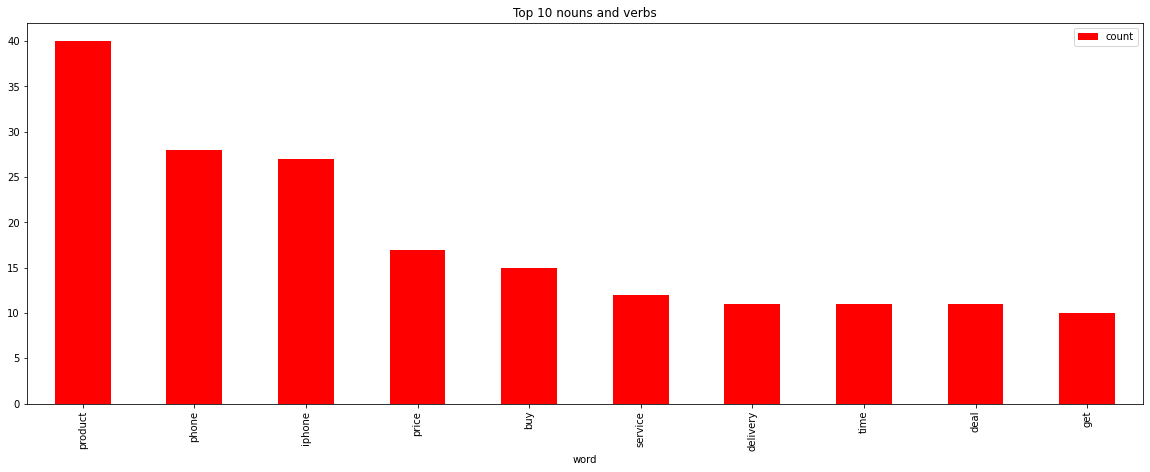

In [35]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word', figsize=(20,7), title='Top 10 nouns and verbs',color='red');


## Emotion Mining Analysis

In [36]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(' '.join(iphone_snapdeal))
sentences

["I'm also happy with Snapdeal service Very good one perfectly the original one with all original accessories offer product is available, customer care also good Price and delivery service are good I received my order on time Totaly satisfy with the product...",
 'It is a brand new 100% genuine iphone.',
 'And got it within 24 hours of ordering....',
 "Packing was superb with 'PRIORITY' mark on the box.... Thanx to snapdeal !",
 'Mobile was got no hang smooth  touch  performing well Features are good....but the phone gets heated after some time got this at a great discount, the phone is worth it.',
 'my wife wanted to try an iphone and she is loving it now I am very very happy with this iPhone .when I was ordering this phone I had little doubt about that.',
 'But after receiving this phone I am really very happy.also found original I iPhone.earlier I had doubted Great product at such amazing price.',
 'Delivery was fast.',
 'N iPhone is amazing.',
 'very good product...thanks to snapde

In [37]:
sent_df= pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I'm also happy with Snapdeal service Very good...
1,It is a brand new 100% genuine iphone.
2,And got it within 24 hours of ordering....
3,Packing was superb with 'PRIORITY' mark on the...
4,Mobile was got no hang smooth touch performi...
...,...
121,i would recommended Snapdeal service my near &...
122,Can be recommended to my friends and family me...
123,dream come true This product is awwsum in use....
124,I would defination prefer this nxt time also I...


In [41]:
# Emotion Lexicon - Affin
affin=pd.read_csv("Afinn.csv",sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [42]:
affinity_scores= affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [43]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp= spacy.load('en_core_web_sm')
sentiment_lexicon= affinity_scores

def calculate_sentiment(text:str=None):
    sent_score= 0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [44]:
# manual testing
calculate_sentiment(text= 'great')

3

In [45]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      17
1       0
2       0
3       5
4       7
       ..
121     7
122     2
123     1
124     5
125    28
Name: sentiment_value, Length: 126, dtype: int64

In [46]:
# how many words are there in a sentence?
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      42
1       8
2       8
3      13
4      30
       ..
121    20
122     9
123    13
124    19
125    75
Name: word_count, Length: 126, dtype: int64

In [47]:
sent_df.sort_values(by= 'sentiment_value')

,sentence,sentiment_value,word_count
31,But those all reviews are fake and just to dam...,-6,14
68,Dont buy on fraudulent schemes.,-4,5
109,Dere is only one problem nd dat is space... Bt...,-4,20
57,Only problem is you need to pay for everything.,-3,9
20,no lagging till today\nsuitable for your busin...,-3,9
...,...,...,...
85,awesum phone.good price good product.iphone is...,12,19
49,Worth buying from snap deal due to its competi...,12,26
0,I'm also happy with Snapdeal service Very good...,17,42
38,Awsme delivry on time and product recievd in g...,21,58


In [48]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    126.000000
mean       2.809524
std        4.417627
min       -6.000000
25%        0.000000
50%        2.500000
75%        4.000000
max       28.000000
Name: sentiment_value, dtype: float64

In [49]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,It is a brand new 100% genuine iphone.,0,8
2,And got it within 24 hours of ordering....,0,8
7,Delivery was fast.,0,3
10,Great Seller.,0,2
11,Genuine Product.,0,2
12,Fast Shipping.,0,2
16,I am new to iphone so till now this is it.,0,11
20,no lagging till today\nsuitable for your busin...,-3,9
30,Honestly speaking initially I was hesitated be...,-2,12
31,But those all reviews are fake and just to dam...,-6,14


In [50]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,I'm also happy with Snapdeal service Very good...,17,42
3,Packing was superb with 'PRIORITY' mark on the...,5,13
4,Mobile was got no hang smooth touch performi...,7,30
5,my wife wanted to try an iphone and she is lov...,6,33
6,But after receiving this phone I am really ver...,6,23
...,...,...,...
121,i would recommended Snapdeal service my near &...,7,20
122,Can be recommended to my friends and family me...,2,9
123,dream come true This product is awwsum in use....,1,13
124,I would defination prefer this nxt time also I...,5,19


In [51]:
# Adding index cloumn
sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I'm also happy with Snapdeal service Very good...,17,42,0
1,It is a brand new 100% genuine iphone.,0,8,1
2,And got it within 24 hours of ordering....,0,8,2
3,Packing was superb with 'PRIORITY' mark on the...,5,13,3
4,Mobile was got no hang smooth touch performi...,7,30,4
...,...,...,...,...
121,i would recommended Snapdeal service my near &...,7,20,121
122,Can be recommended to my friends and family me...,2,9,122
123,dream come true This product is awwsum in use....,1,13,123
124,I would defination prefer this nxt time also I...,5,19,124


C:\Users\Rumana\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

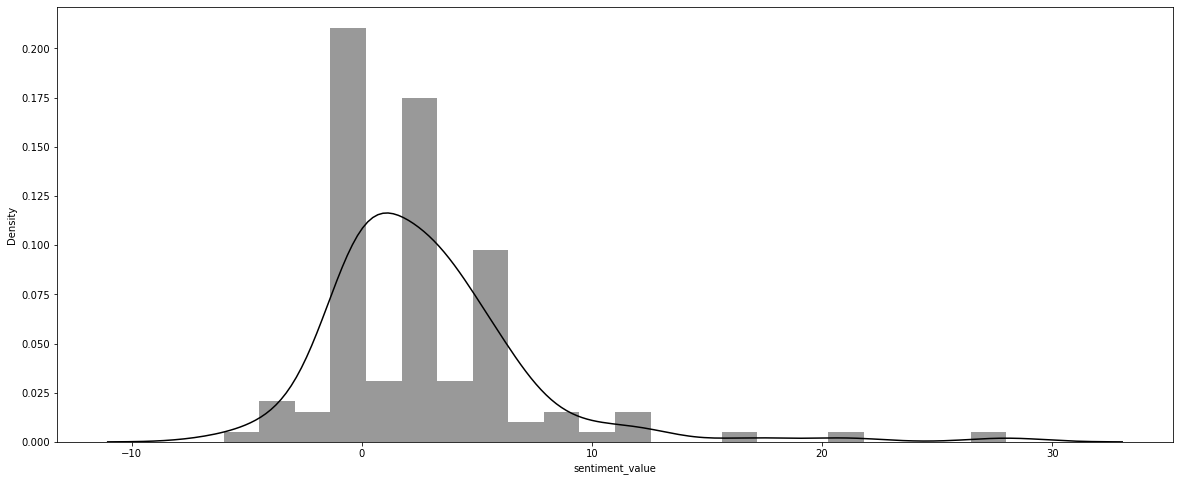

In [52]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize= (20,8))
sns.distplot(sent_df['sentiment_value'],color="black")

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

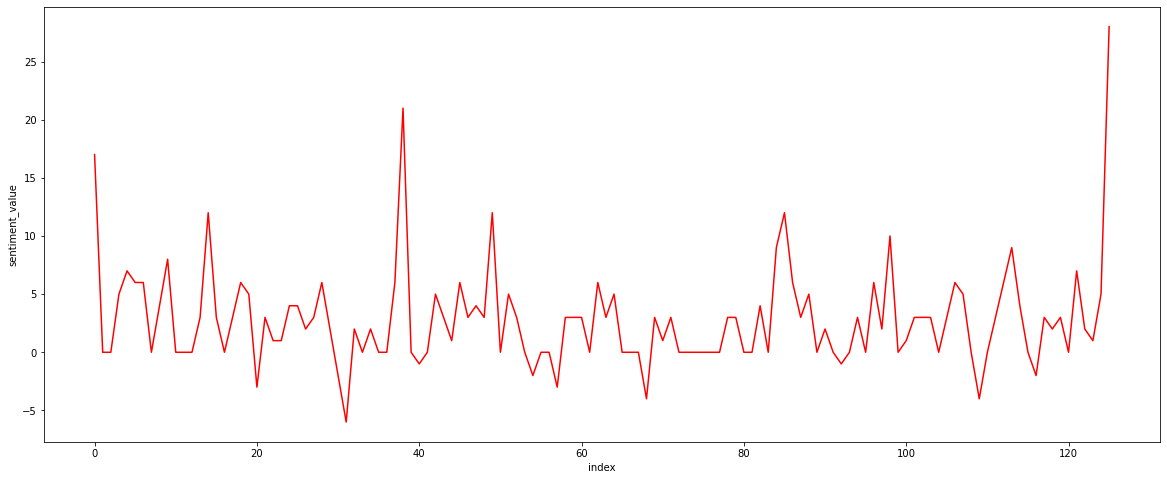

In [53]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize= (20,8))
sns.lineplot(y= 'sentiment_value',x= 'index',data= sent_df,color= 'red')

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

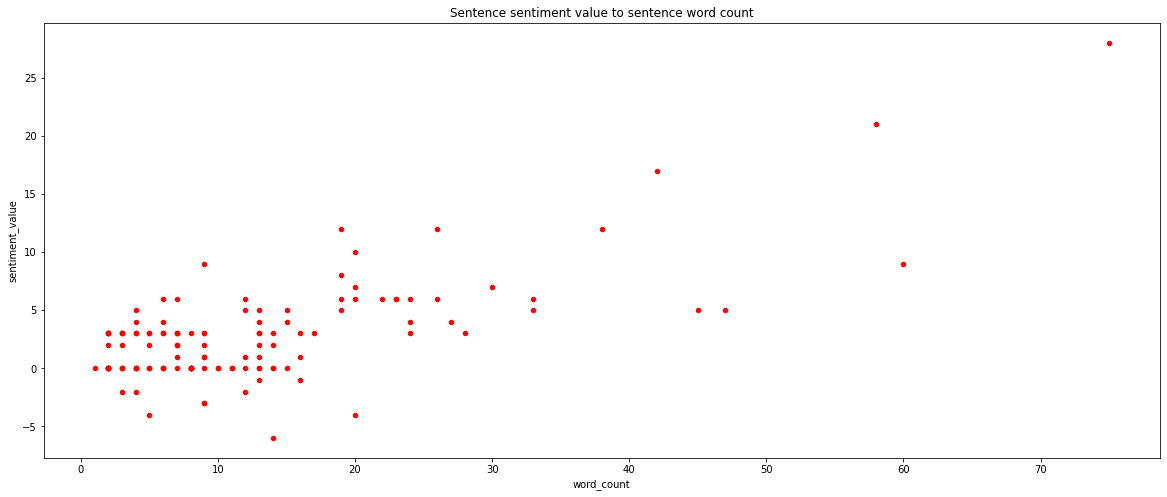

In [54]:
# Correlation analysis
sent_df.plot.scatter(x= 'word_count',y= 'sentiment_value',figsize=(20,8),title= 'Sentence sentiment value to sentence word count',color='red')